# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [33]:
import requests

url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv'
response = requests.get(url)


with open('financial_news_headlines.csv', 'wb') as f:
    f.write(response.content)

## 2. Load the dataset [1 point]

In [34]:
import pandas as pd
import numpy as np


df = pd.read_csv('financial_news_headlines.csv', encoding='latin1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 3. Explore the dataset [10 points]

Dataset Shape: (4845, 2)

Columns: ['Sentiment', 'Headlines']

Missing Values:
Sentiment    0
Headlines    0
dtype: int64

Value Counts for Sentiment:
Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

Basic Statistics:
       Sentiment                                          Headlines
count       4845                                               4845
unique         3                                               4837
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2878                                                  2


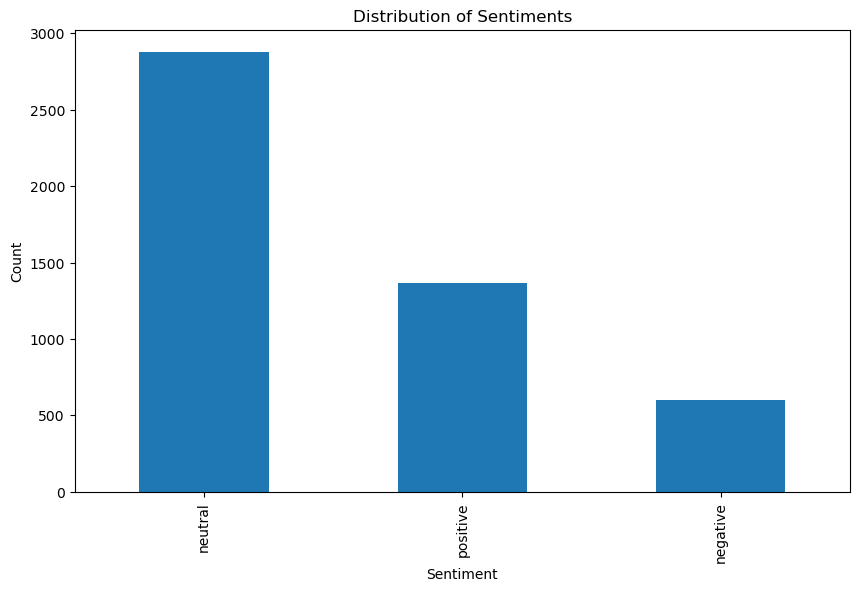

In [35]:

df.columns = ['Sentiment', 'Headlines']


print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nValue Counts for Sentiment:")
print(df['Sentiment'].value_counts())


print("\nBasic Statistics:")
print(df.describe())


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 4. Clean the data [5 points]

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    
    text = text.lower()

   
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
  
    tokens = word_tokenize(text)
    
   
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
   
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    
    return ' '.join(tokens)


df['cleaned_headlines'] = df['Headlines'].apply(clean_text)


print("Original vs Cleaned Headlines:")
for i in range(5):
    print(f"\nOriginal: {df['Headlines'].iloc[i]}")
    print(f"Cleaned:  {df['cleaned_headlines'].iloc[i]}")

[nltk_data] Downloading package punkt to /Users/omisesan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omisesan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/omisesan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original vs Cleaned Headlines:

Original: Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
Cleaned:  technopolis plan develop stage area le square meter order host company working computer technology telecommunication statement said

Original: The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .
Cleaned:  international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported

Original: With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production p

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [37]:
#pip show scikit-learn imbalanced-learn


In [38]:
#pip install --upgrade scikit-learn imbalanced-learn


Class distribution before SMOTE:
Counter({'neutral': 2878, 'positive': 1363, 'negative': 604})

Class distribution after SMOTE:
Counter({'neutral': 2878, 'negative': 2878, 'positive': 2878})


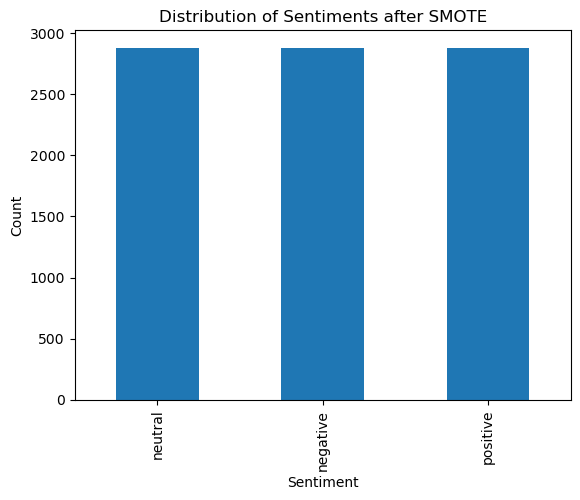

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)


X = df['cleaned_headlines']
y = df['Sentiment']

#
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X_vec = vectorizer.fit_transform(X)

X_smote, y_smote = smote.fit_resample(X_vec, y)


print("Class distribution before SMOTE:")
print(Counter(y))
print("\nClass distribution after SMOTE:")
print(Counter(y_smote))


pd.Series(y_smote).value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments after SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 6. BoW model [15 points]

In [40]:
from sklearn.feature_extraction.text import CountVectorizer


bow_vectorizer = CountVectorizer(max_features=5000)
 

if 'X_smote' in locals():
    
    bow_features = X_smote  
else:
    
    bow_features = bow_vectorizer.fit_transform(df['cleaned_headlines'])

   
    print(f"Vocabulary size: {len(bow_vectorizer.vocabulary_)}")
    print("\nSample features (first 10):")
    print(list(bow_vectorizer.vocabulary_.items())[:10])

   
    print(f"\nBoW matrix shape: {bow_features.shape}")

    bow_df = pd.DataFrame(bow_features.toarray()[:5, :10],
                        columns=list(bow_vectorizer.get_feature_names_out()[:10]))
    print("\nSample of BoW matrix (first 5 rows, first 10 features):")
    print(bow_df)

## 7. Tf-idf model [15 points]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer                                            
                                                                                                        
                                                          
tfidf_vectorizer = TfidfVectorizer(max_features=5000)                                                  
                                                                                                    
                                                                  
if 'X_smote' in locals():                                                                              
                                                     
    tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_headlines'])                           
else:                                                                                                  
                                                  
    tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_headlines'])                           
                                                                                                    
                                   
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")                                         
print("\nSample features with IDF scores:")                                                            
idf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))                
print(dict(list(idf_scores.items())[:10]))


print(f"\nTF-IDF matrix shape: {tfidf_features.shape}")


tfidf_df = pd.DataFrame(tfidf_features.toarray()[:5, :10],
                    columns=list(tfidf_vectorizer.get_feature_names_out()[:10]))
print("\nSample of TF-IDF matrix (first 5 rows, first 10 features):")
print(tfidf_df)

Vocabulary size: 5000

Sample features with IDF scores:
{'ab': 6.118613071389997, 'abb': 8.099614540256582, 'abc': 8.099614540256582, 'ability': 8.099614540256582, 'able': 6.595537143480306, 'abloy': 8.792761720816525, 'abn': 8.099614540256582, 'abp': 7.088013628578101, 'abroad': 7.183323808382426, 'ac': 6.920959543914934}

TF-IDF matrix shape: (4845, 5000)

Sample of TF-IDF matrix (first 5 rows, first 10 features):
    ab  abb  abc  ability  able  abloy  abn  abp  abroad   ac
0  0.0  0.0  0.0      0.0   0.0    0.0  0.0  0.0     0.0  0.0
1  0.0  0.0  0.0      0.0   0.0    0.0  0.0  0.0     0.0  0.0
2  0.0  0.0  0.0      0.0   0.0    0.0  0.0  0.0     0.0  0.0
3  0.0  0.0  0.0      0.0   0.0    0.0  0.0  0.0     0.0  0.0
4  0.0  0.0  0.0      0.0   0.0    0.0  0.0  0.0     0.0  0.0


## 8. Split train test data [3 points]

In [42]:
from sklearn.model_selection import train_test_split


if 'X_smote' in locals():
   
    X = X_smote  
    y = y_smote
else:
   
    X = bow_features  
    y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts())

Training set shape: (6907, 1000)
Testing set shape: (1727, 1000)

Class distribution in training set:
Sentiment
positive    2305
neutral     2304
negative    2298
Name: count, dtype: int64

Class distribution in test set:
Sentiment
negative    580
neutral     574
positive    573
Name: count, dtype: int64


## 9. Classification Algorithm [10 points]
- Train
- Predict

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model = rf_classifier.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Results:
Accuracy: 0.7174290677475391

Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.89      0.78       580
     neutral       0.78      0.70      0.74       574
    positive       0.69      0.56      0.62       573

    accuracy                           0.72      1727
   macro avg       0.72      0.72      0.71      1727
weighted avg       0.72      0.72      0.71      1727



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


dt_classifier = DecisionTreeClassifier(random_state=42)


dt_model = dt_classifier.fit(X_train, y_train)


dt_pred = dt_model.predict(X_test)


print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))


Decision Tree Results:
Accuracy: 0.6670526925303996

Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.89      0.74       580
     neutral       0.76      0.57      0.65       574
    positive       0.63      0.54      0.58       573

    accuracy                           0.67      1727
   macro avg       0.68      0.67      0.66      1727
weighted avg       0.68      0.67      0.66      1727



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

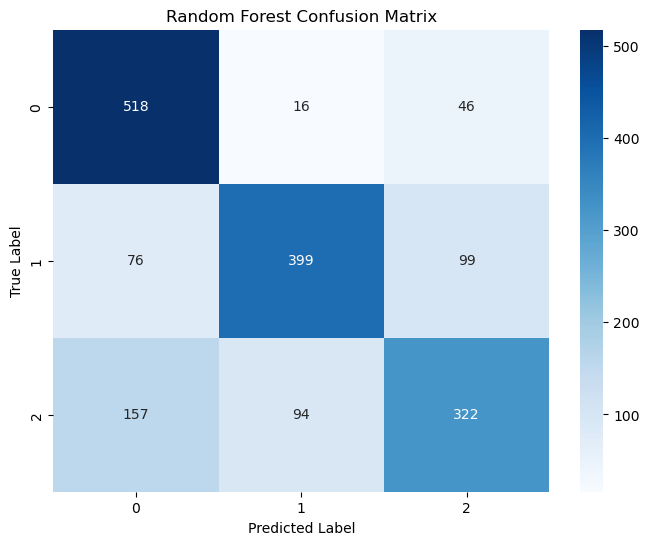

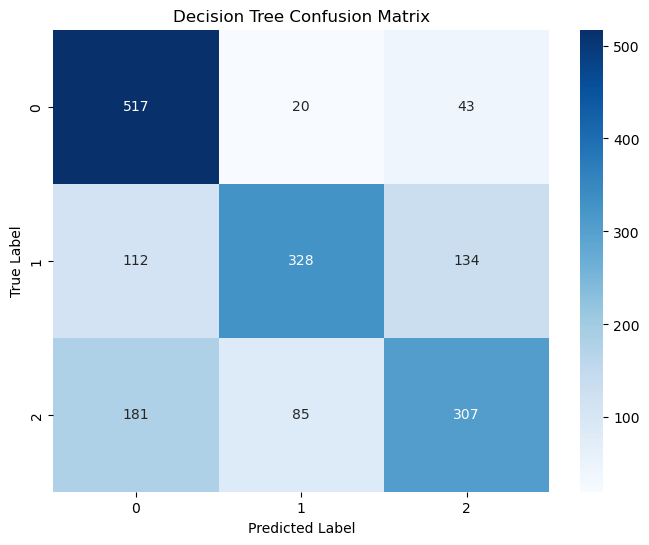

Overall Model Accuracies:
Random Forest: 0.7174
Deision Tree: 0.6671


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix')


print("Overall Model Accuracies:")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Deision Tree: {accuracy_score(y_test, dt_pred):.4f}")